<a href="https://colab.research.google.com/github/asu2304/dog_vs_cats_identification/blob/main/cats_vs_dogs_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

# usual code
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [12]:
# api command
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [13]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import  keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [14]:
# genertators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels  = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# normalizing the images:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

In [16]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
# creating the CNN models
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [28]:
# compiling the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )


In [30]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3742 - accuracy: 0.8269 - val_loss: 0.4520 - val_accuracy: 0.7970
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2547 - accuracy: 0.8910 - val_loss: 0.6094 - val_accuracy: 0.7898
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1522 - accuracy: 0.9401 - val_loss: 0.7119 - val_accuracy: 0.7924
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0975 - accuracy: 0.9638 - val_loss: 0.8304 - val_accuracy: 0.7884
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.0717 - accuracy: 0.9740 - val_loss: 1.0341 - val_accuracy: 0.7828
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 1.4932 - val_accuracy: 0.7792
Epoch 7/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0430 - accuracy: 0.9857 - val_loss: 1.1115 - val_accuracy

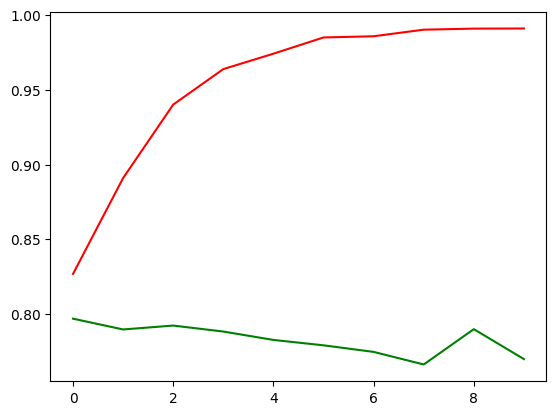

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'train')

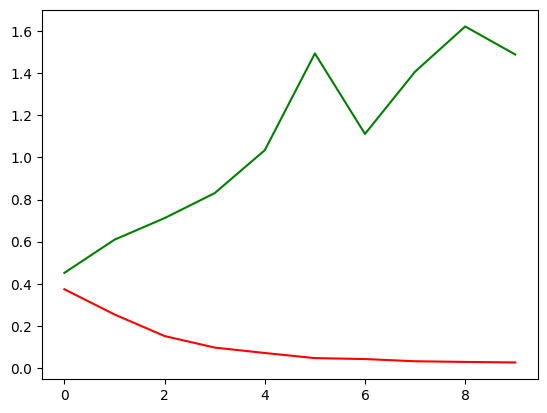

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'green', label = 'train')

# ways to reduce overfitting

add more data

data augmentation

L1/L2 regularization

Dropout

Batch Norm

Reduce the complexity



In [2]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# creating the CNN models
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [7]:
# compiling the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )


In [17]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 108ms/step - loss: 1.2656 - accuracy: 0.5925 - val_loss: 0.6015 - val_accuracy: 0.6828
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5646 - accuracy: 0.7082 - val_loss: 0.5115 - val_accuracy: 0.7482
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4791 - accuracy: 0.7765 - val_loss: 0.5585 - val_accuracy: 0.7218
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4147 - accuracy: 0.8128 - val_loss: 0.4430 - val_accuracy: 0.7950
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3860 - accuracy: 0.8314 - val_loss: 0.5539 - val_accuracy: 0.7622
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3020 - accuracy: 0.8719 - val_loss: 0.4814 - val_accuracy: 0.8006
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2146 - accuracy: 0.9125 - val_loss: 0.8683 - val_ac

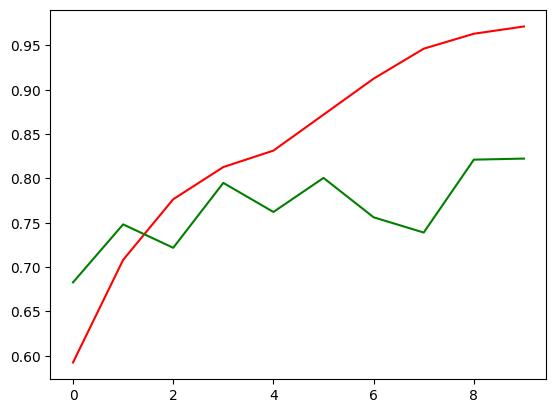

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'train')

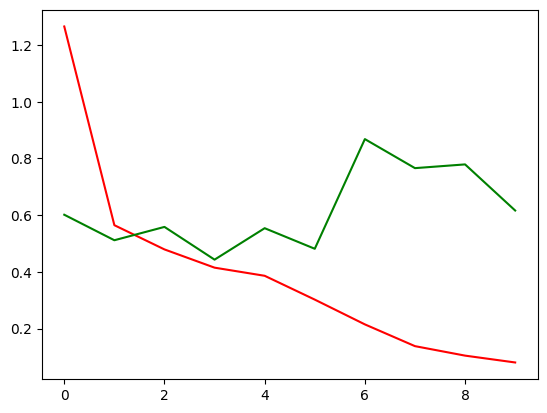

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'green', label = 'train')

**here we have succesfully increased accuracy significantly just using batch normalization and Dropouts.**